# 6-3 탐색적 데이터 분석

## 6.3.2 데이터 둘러보기

In [5]:
import numpy as np
import pandas as pd

In [7]:
train = pd.read_csv('train.csv') # 훈련 데이터
test = pd.read_csv('test.csv') # 테스트 데이터
submission = pd.read_csv('sampleSubmission.csv') # 제출 샘플 데이터

In [8]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
test.head()

# 테스트 데이터에는 casual과 registered 피처가 빠짐
# 모델 훈련 시에도 훈련 데이터의 casual과 registered 피처를 빼야 함

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [12]:
submission.head()

# ▪ 현재 타깃값인 count는 모두 0으로 기록됨
#▪ 시간대별 대여 수량을 예측해 이 값을 바꾼 뒤 제출하면 됨
#▪ ID 값인 datetime은 데이터를 구분하는 역할만 함, 
# 타깃값 예측에는 아무런 도움을 주지 않아 추후 모델 훈련 시 제거할 계획

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [13]:
train.info()

# 훈련데이터의 결측값 개수와 데이터 타입 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
# 테스트 데이터의 결측값 개수와 데이터 타입 파악
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 6.3.3 더 효과적인 분석을 위한 피처 엔지니어링

In [16]:
# 일부 데이터는 시각화하기에 적합하지 않은 형태일 수 있음(ex. datetime)
# 시각화하기 전에 datetime 피처를 분석하기에 적합한 형태로 변환해야 함
# datetime 피처를 세부 구성요소(연도, 월, 일, 시간, 분, 초)로 나누기

print(train['datetime'][100]) # datetime 100번째 원소
print(train['datetime'][100].split()) # 공백 기준으로 문자열 나누기
print(train['datetime'][100].split()[0]) # 날짜
print(train['datetime'][100].split()[1]) # 시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [19]:
#  날짜 문자열을 "-" 문자를 기준으로 다시 연도, 월, 일로 나누기
print(train['datetime'][100].split()[0])
print(train['datetime'][100].split()[0].split("-")) # "-" 기준으로 문자열 나누기
print(train['datetime'][100].split()[0].split("-")[0]) # 연도
print(train['datetime'][100].split()[0].split("-")[1]) # 월
print(train['datetime'][100].split()[0].split("-")[2]) # 일

2011-01-05
['2011', '01', '05']
2011
01
05


In [21]:
#  시간 문자열을 "-" 문자를 기준으로 다시 시, 분, 초로 나누기
print(train['datetime'][100].split()[1]) # 시간
print(train['datetime'][100].split()[1].split(":")) # ":" 기준으로 문자열 나누기
print(train['datetime'][100].split()[1].split(":")[0]) # 시간
print(train['datetime'][100].split()[1].split(":")[1]) # 분
print(train['datetime'][100].split()[1].split(":")[2]) # 초

09:00:00
['09', '00', '00']
09
00
00


In [22]:
# 판다스 apply( ) 함수로 앞서 살펴본 로직을 datetime에 적용해 
# 날짜(date), 연도(year), 월(month), 일(day), 시(hour), 분(minute), 초(second) 피처 생성


train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성
# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [25]:
# 요일 피처 생성
# ▪ datetime과 calendar 라이브러리 활용
# 0: 월요일, 1: 화요일, 2: 수요일

from datetime import datetime # datetime 라이브러리 임포트
import calendar
print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
# 정수로 요일 반환
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday())
# 문자열로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [26]:
train['weekday'] = train['date'].apply(
lambda dateString:
calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [27]:
train['season'] = train['season'].map({1: 'Spring',
2: 'Summer',
3: 'Fall',
4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear',
2: 'Mist, Few clouds',
3: 'Light Snow, Rain, Thunderstorm',
4: 'Heavy Rain, Thunderstorm, Snow, Fog'})

In [28]:
# 바뀐 훈련 데이터
train.head()

#① date ~ weekday 피처 추가됨
#② season과 weather 피처는 숫자에서 문자로 바뀜
#date 피처 정보는 year, month, day 피처에 포함되므로 추후 date 피처 제거
#세 달씩 ‘월’을 묶으면 ‘계절’이 되므로 추후 season 피처만 남기고 month 피처는 제거

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Saturday


## 6.3.4 데이터 시각화

In [29]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


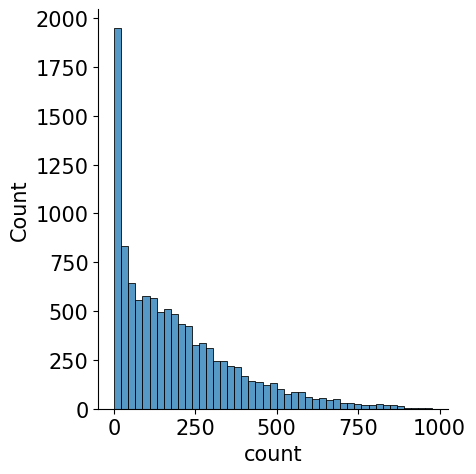

In [30]:
mpl.rc('font', size=15) # 폰트 크기를 15로 설정
sns.displot(train['count']); # 분포도 출력

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


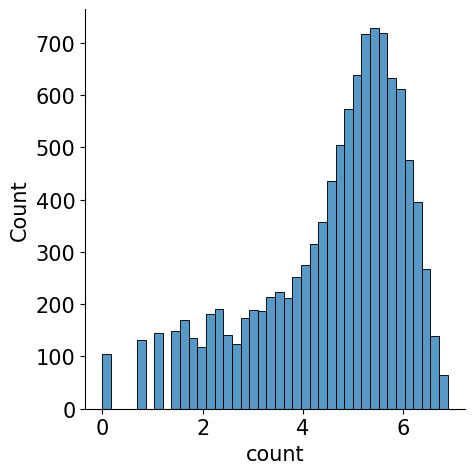

In [32]:
sns.displot(np.log(train['count']))